In [34]:
import pandas as pd
from regimeaware.routines import cfg
import seaborn as sns
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [63]:
state_betas = pd.read_pickle(f'{cfg.data_fldr}/exposures/state_betas.pkl')
ols_betas = pd.read_pickle(f'{cfg.data_fldr}/exposures/ols_betas.pkl')
state_means = pd.read_pickle(f'{cfg.data_fldr}/regimes/mu.pkl')
state_vcv = pd.read_pickle(f'{cfg.data_fldr}/regimes/sigma.pkl')

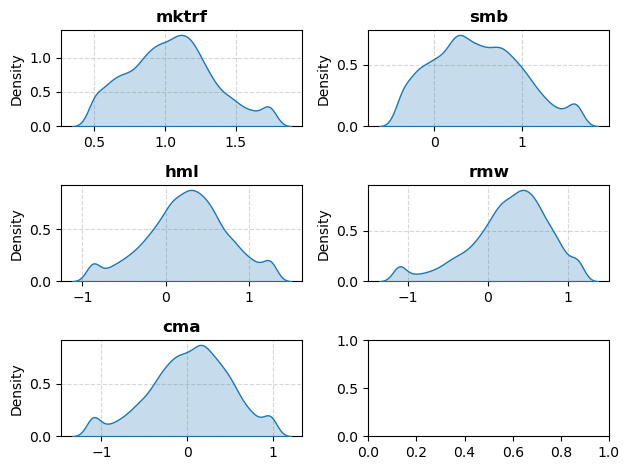

In [50]:
# Empirical distribution of factor loadings
fig, axs = plt.subplots(nrows=3, ncols=2)
for i, fact in enumerate(cfg.factor_set):
    _vals = ols_betas.xs(fact, level=2)
    _vals = winsorize(_vals, limits=[.025, .025]).data
    ax = axs.flatten()[i]
    sns.kdeplot(data=_vals, ax=ax, bw_adjust=2, fill=True, zorder=25)
    ax.set_title(fact, weight='bold')
    ax.grid(ls='--', alpha=.5, zorder=-25)

plt.tight_layout()

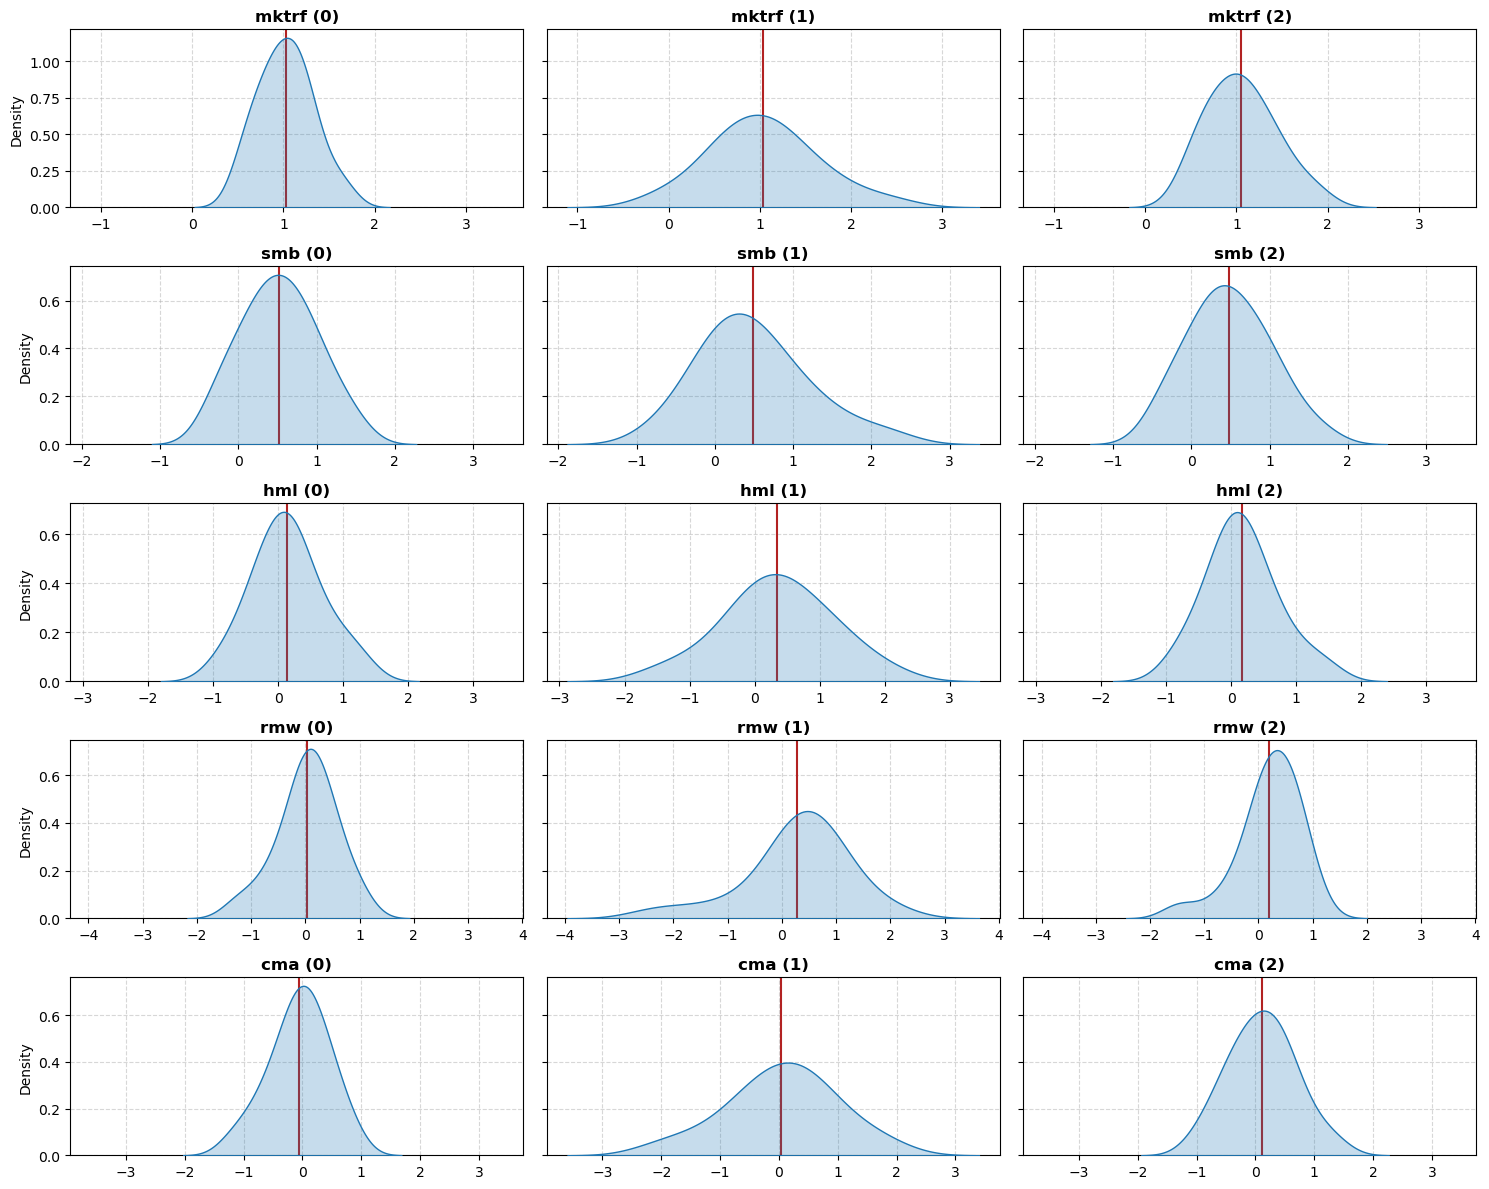

In [62]:
# Empirical distribution of factor loadings
fig, axs = plt.subplots(nrows=len(cfg.factor_set), ncols=cfg.n_states, figsize=(len(cfg.factor_set) * 3, 12), sharex='row', sharey='row')
for i, fact in enumerate(cfg.factor_set):
    for m in range(cfg.n_states):
        _vals = state_betas[fact].xs(m, level=2).xs('2023-12-31')
        _vals = winsorize(_vals, limits=[.025, .025]).data
        ax = axs[(i, m)]
        sns.kdeplot(data=_vals, ax=ax, bw_adjust=2, fill=True, zorder=25)
        ax.set_title(f"{fact} ({m})", weight='bold')
        ax.axvline(np.mean(_vals), c='firebrick')
        ax.grid(ls='--', alpha=.5, zorder=-25)

plt.tight_layout()

In [76]:
startprob = np.array([0.6, 0.3, 0.1, 0.0])
transmat = np.array(
    [
        [0.7, 0.2, 0.0, 0.1],
        [0.3, 0.5, 0.2, 0.0],
        [0.0, 0.3, 0.5, 0.2],
        [0.2, 0.0, 0.2, 0.6]
    ]
)

means = np.array(
    [
        [0.0, 0.0],
        [0.0, 11.0],
        [9.0, 10.0],
        [11.0, -1.0]
    ]
)

covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

Z

array([2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 0,
       0, 1, 0, 0, 3, 3, 0, 0, 1, 0, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 1, 1, 2, 1,
       2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
np.tile(np.identity(2), (2, 1, 1))

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [84]:
startprob = np.array([1, 0])
transmat = np.array(
    [
        [0.85, 0.15],
        [0.4, 0.6],
    ]
)

means = np.array(
    [
        [0.1],
        [-0.1],
    ]
)

covars = np.array([1, 1]).reshape(-1, 1)

# Build an HMM instance and set parameters
gen_model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
gen_model.startprob_ = startprob
gen_model.transmat_ = transmat
gen_model.means_ = means
gen_model.covars_ = covars

# Generate samples
X, Z = gen_model.sample(500)

Z

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,

<Axes: >

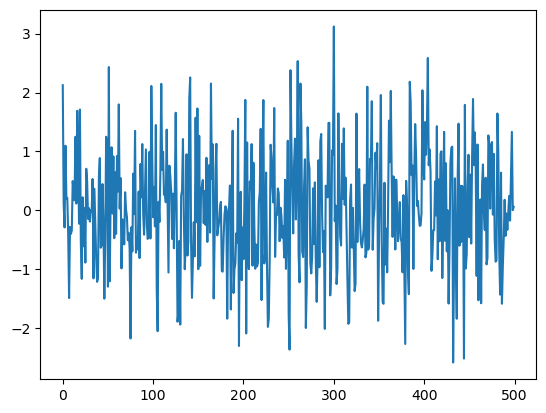

In [89]:
pd.Series(X.flatten()).plot()